# MNIST Handwritten Digit Classification

## Abstract

In this notebook we play a bit with the MNIST dataset. The goal is to learn a simple example of classification of handwritten digits using various techniques and serve as an introduction to PyTorch. We compare the accuracy and the required training time for Neural Networks of different number of Hidden Units. We also compare a few different optimizers.


---

## Table of Contents

1. **Install PyTorch**
2. **Dataloader, Transform**
4. **Modeling the NN**
5. **Loss and Optimizer**
6. **Training**
7. **Model Evaluation**
8. **Testing the accuracy**


## Install Libraries

In [44]:
#Libraries needed to load the data and to look at the images
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Additional libraries needed for the Neural Network
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

## Dataloader, Transform

In [23]:
# Define the transform to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Load the MNIST dataset from the local directory
data_dir = 'C:/Users/eduar/ML_codes/data'
train_dataset = datasets.MNIST(root=data_dir, train=True, transform=transform, download=False)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28]) torch.Size([64])


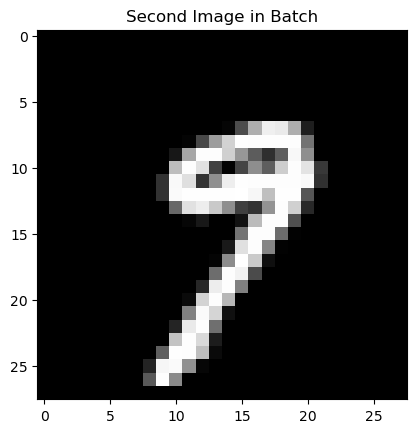

(-1.0, 1.0)
tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0

In [101]:
# look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)
# inputs.shape = (batch_size, channels, height, width)
inputs[1].shape
#Let us plot some random image
chose_pic = inputs[0].squeeze()  # Remove the channel dimension to get a 2D array
plt.imshow(chose_pic.numpy(), cmap='gray')  # Convert to numpy array and display as grayscale
# Comment: plt.imshow automatically scales the data to fit the [0, 1] range for grayscale images if you don’t specify vmin and vmax.
plt.title('Second Image in Batch')
plt.show()
min_value = chose_pic.min()
max_value = chose_pic.max()
print(f"({min_value.item()}, {max_value.item()})")
print(chose_pic)

### Batch Size:
This is the number of images in a single batch. In your case, it is 64 because you set batch_size=64 when creating the DataLoader. This dimension helps in processing multiple images simultaneously during training.
### Channels:
For MNIST, the images are grayscale, so there is only one channel. Therefore, this dimension is 1. If you were working with RGB images, this would be 3 (one for each color channel: Red, Green, Blue).
### Height:
For MNIST, each image is 28 pixels tall.
### Width:
For MNIST, each image is 28 pixels wide.

In [62]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


Labels:  [7 1 1 6 1 0 7]


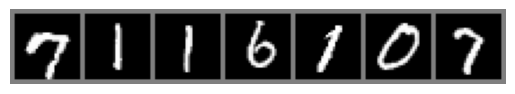

In [19]:
# Define a function to display images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()    # convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # plot image
    plt.axis('off')        # Hide axis
    plt.show()

# Function to show a few sample images from the dataset
def show_sample_images(dataset, num_samples=7):
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)
    images, labels = next(iter(data_loader))
    
    print("Labels: ", labels.numpy())
    
    # Create a grid of images
    img_grid = torchvision.utils.make_grid(images)
    imshow(img_grid)

# Show some sample images from the MNIST dataset
show_sample_images(train_dataset)

In [ ]:
# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 128
output_size = 10   # 10 classes for digits 0-9
learning_rate = 0.001
batch_size = 64
num_epochs = 5

## Modeling the NN

In [60]:
class One_NN(nn.Module):
    def __init__(self):
        super(One_NN, self).__init__()
        self.hidden_layer = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [55]:
# Define the feed-forward neural network model
class Two_NN(nn.Module):
    def __init__(self):
        super(Two_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
        self.fc2 = nn.Linear(128, 64)     # Hidden layer to hidden layer
        self.fc3 = nn.Linear(64, 10)      # Hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer
        return x

## Loss and Optimizer

In [57]:
# Set up the device, model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_one = One_NN().to(device)
model_two = Two_NN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_one = optim.Adam(model_one.parameters(), lr=0.001)
optimizer_two = optim.Adam(model_two.parameters(), lr=0.001)

## Training

### One Hidden Unit

In [61]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time of the epoch
    model_one.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model_one(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer_one.zero_grad()
        loss.backward()
        optimizer_one.step()
        
        running_loss += loss.item()
    
    end_time = time.time()  # Record the end time of the epoch
    epoch_duration = end_time - start_time  # Calculate the duration of the epoch
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Time: {epoch_duration:.2f} seconds')

Epoch [1/5], Loss: 0.0843, Time: 11.39 seconds
Epoch [2/5], Loss: 0.0749, Time: 11.14 seconds
Epoch [3/5], Loss: 0.0672, Time: 10.80 seconds
Epoch [4/5], Loss: 0.0635, Time: 11.55 seconds
Epoch [5/5], Loss: 0.0567, Time: 11.37 seconds


### Two Hidden Units

In [59]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    start_time = time.time()  # Record the start time of the epoch
    model_two.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model_two(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer_two.zero_grad()
        loss.backward()
        optimizer_two.step()
        
        running_loss += loss.item()
    
    end_time = time.time()  # Record the end time of the epoch
    epoch_duration = end_time - start_time  # Calculate the duration of the epoch
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Time: {epoch_duration:.2f} seconds')

Epoch [1/5], Loss: 0.3811, Time: 11.12 seconds
Epoch [2/5], Loss: 0.1857, Time: 11.30 seconds
Epoch [3/5], Loss: 0.1309, Time: 11.73 seconds
Epoch [4/5], Loss: 0.1064, Time: 11.66 seconds
Epoch [5/5], Loss: 0.0905, Time: 11.67 seconds


**Results Summary**

<div style="border: 2px solid orange; padding: 10px; border-radius: 0px; display: inline-block; background-color: #fff5e6;">
    <strong> The NN with 2 layers is a bit more accurate and takes a bit more time, as expected!</strong>
</div>

## Model Evaluation

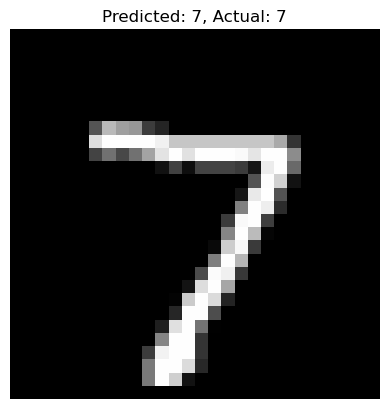

In [42]:
# Get a batch of 5 images from the test dataset
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Get predictions for these 5 images
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(images[:5])
    _, predictions = torch.max(outputs, 1)

# Function to display an image and its predicted and actual label
def show_example(data, prediction, label):
    plt.imshow(data.squeeze(), cmap='gray')
    plt.title(f'Predicted: {prediction}, Actual: {label}')
    plt.axis('off')
    plt.show()
    
# Display the images with their predicted and actual labels
for i in range(1):
    show_example(images[i], predictions[i].item(), labels[i].item())

## Testing Accuracy

In [43]:
# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Initialize variables to track performance
correct = 0
total = 0

# Disable gradient calculation for testing
with torch.no_grad():
    for data, targets in test_loader:
        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(data)
        
        # Get the predicted class (highest value in the output tensor)
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the total number of correct predictions and total samples
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

# Calculate and print the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the 10,000 test images: {accuracy:.2f}%')


Accuracy of the model on the 10,000 test images: 96.57%
